In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')
df = pd.read_csv("diabetes.csv")
print(df.describe())
df  = df.drop_duplicates()
##print(df.shape)
##print(df.isnull().sum())
##print(df.columns)
print('No. of zero values in Glucose ',df[df['Glucose']==0].shape[0])
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
print('No. of zero values in Glucose ',df[df['Glucose']==0].shape[0])
print('No. of zero values in BloodPressure ',df[df['BloodPressure']==0].shape[0])
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
print('No. of zero values in BloodPressure ',df[df['BloodPressure']==0].shape[0])
print('No. of zero values in SkinThickness ',df[df['SkinThickness']==0].shape[0])
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
print('No. of zero values in SkinThickness ',df[df['SkinThickness']==0].shape[0])
print('No. of zero values in Insulin ',df[df['Insulin']==0].shape[0])
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
print('No. of zero values in Insulin ',df[df['Insulin']==0].shape[0])
print('No. of zero values in BMI ',df[df['BMI']==0].shape[0])
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
print('No. of zero values in BMI ',df[df['BMI']==0].shape[0])
##print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

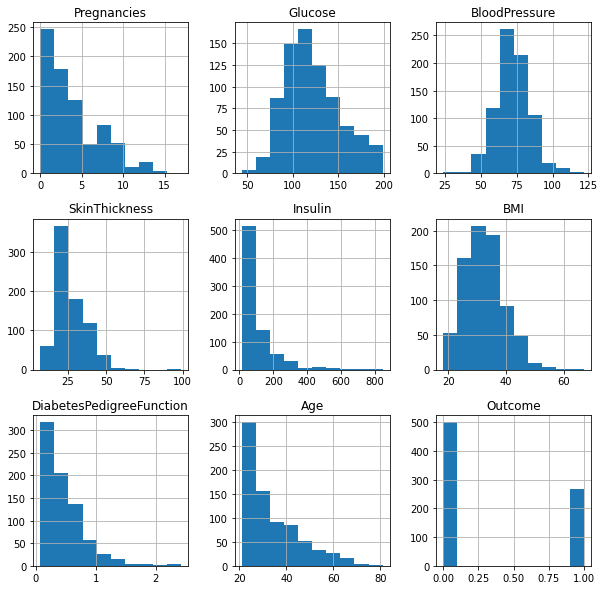

In [ ]:
df.hist(bins=10,figsize=(10,10))
plt.show()

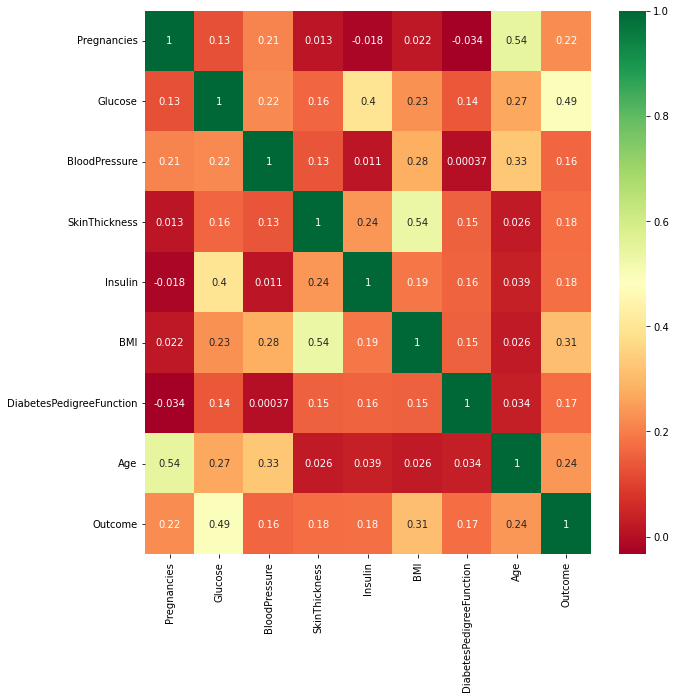

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
target_name = 'Outcome'
#seperate object for target feature
y = df[target_name]

#seperate object for Input features
X = df.drop(target_name,axis=1)
print(X.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


In [ ]:
#Applying  Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX  = scaler.transform(X)


In [ ]:
# Train Test Split
from sklearn .model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [ ]:
# Build the CLASSIFICATION Algorithms

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear',multi_class='ovr')
lr.fit(X_train,y_train)


# Making prediction on test by using Logistic Regression
print(X_test.shape)
# Making predictions on test dataset
lr_pred = lr.predict(X_test)
print(lr_pred.shape)

(154, 8)
(154,)


In [ ]:
# KNeighboursClassifier (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

## Making Prediction on test by using KNN
print(X_test.shape)
# Making predictions on test dataset
knn_pred = knn.predict(X_test)
print(knn_pred.shape)


(154, 8)
(154,)


In [ ]:
# Naive-Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

## Making Prediction on test by using Naivie Bayes
print(X_test.shape)
# Making predictions on test dataset
nb_pred = nb.predict(X_test)
print(nb_pred.shape)

(154, 8)
(154,)


In [ ]:
# Support Vector Machie (SVM)
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)


## Making Prediction on test by using Support Vector Machine
print(X_test.shape)
# Making predictions on test dataset
sv_pred = sv.predict(X_test)
print(sv_pred.shape)

(154, 8)
(154,)


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

## Making Prediction on test by using Decision Tree
print(X_test.shape)
# Making predictions on test dataset
dt_pred = dt.predict(X_test)
print(dt_pred.shape)

(154, 8)
(154,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train,y_train)



## Making Prediction on test by using Random Forest
print(X_test.shape)
# Making predictions on test dataset
rf_pred = rf.predict(X_test)
print(rf_pred.shape)



(154, 8)
(154,)


In [ ]:
# Model Evaluation
# Train Score and Test Score of Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("precision Score is:",precision_score(y_test,lr_pred)*100)
print("Train Accuracy of Logistic Regression",lr.score(X_train,y_train)*100)
print("Acuuracy (Test) score of Logistic Regression",lr.score(X_test,y_test)*100)
print("Accuracy score of Logistic Regression",accuracy_score(y_test,lr_pred)*100)
print("F1-Score on Non weighted score is:",f1_score(y_test, lr_pred,average=None)*100)
print("Recall Score is:",recall_score(y_test,lr_pred)*100)

precision Score is: 75.0
Train Accuracy of Logistic Regression 77.36156351791531
Acuuracy (Test) score of Logistic Regression 77.27272727272727
Accuracy score of Logistic Regression 77.27272727272727
F1-Score on Non weighted score is: [83.09178744 65.34653465]
Recall Score is: 57.89473684210527


In [ ]:
# Train Score and Test Score of KNN
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("precision Score is:",precision_score(y_test,knn_pred)*100)
print("Train Accuracy of KNN",knn.score(X_train,y_train)*100)
print("Acuuracy (Test) score of KNN",knn.score(X_test,y_test)*100)
print("Accuracy  score of KNN",accuracy_score(y_test,knn_pred)*100)
print("F1-Score on Non weighted score is:",f1_score(y_test, knn_pred,average=None)*100)
print("Recall Score is:",recall_score(y_test,knn_pred)*100)

precision Score is: 68.75
Train Accuracy of KNN 81.10749185667753
Acuuracy (Test) score of KNN 74.67532467532467
Accuracy  score of KNN 74.67532467532467
F1-Score on Non weighted score is: [80.78817734 62.85714286]
Recall Score is: 57.89473684210527


In [ ]:
# Train Score and Test Score of Naive-Bayes
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("precision Score is:",precision_score(y_test,nb_pred)*100)
print("Train Accuracy of Naive Bayes",nb.score(X_train,y_train)*100)
print("Acuuracy (Test) score of Naive Bayes",nb.score(X_test,y_test)*100)
print("Accuracy score of Naive Bayes",accuracy_score(y_test,nb_pred)*100)
print("F1-Score on Non weighted score is:",f1_score(y_test, nb_pred,average=None)*100)
print("Recall Score is:",recall_score(y_test,nb_pred)*100)

precision Score is: 65.45454545454545
Train Accuracy of Naive Bayes 74.2671009771987
Acuuracy (Test) score of Naive Bayes 74.02597402597402
Accuracy score of Naive Bayes 74.02597402597402
F1-Score on Non weighted score is: [79.59183673 64.28571429]
Recall Score is: 63.1578947368421


In [ ]:
# Train Score and Test Score of SVM
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("precision Score is:",precision_score(y_test,sv_pred)*100)
print("Train Accuracy of SVM",sv.score(X_train,y_train)*100)
print("Acuuracy (Test) score of SVM",sv.score(X_test,y_test)*100)
print("Accuracy score of SVM",accuracy_score(y_test,sv_pred)*100)
print("F1-Score on Non weighted score is:",f1_score(y_test, sv_pred,average=None)*100)
print("Recall Score is:",recall_score(y_test,sv_pred)*100)

precision Score is: 86.04651162790698
Train Accuracy of SVM 81.92182410423453
Acuuracy (Test) score of SVM 83.11688311688312
Accuracy score of SVM 83.11688311688312
F1-Score on Non weighted score is: [87.5 74. ]
Recall Score is: 64.91228070175438


In [ ]:
# Train Score and Test Score of Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("precision Score is:",precision_score(y_test,dt_pred)*100)
print("Train Accuracy of Decision Tree",dt.score(X_train,y_train)*100)
print("Acuuracy (Test) score of Decision Tree",dt.score(X_test,y_test)*100)
print("Accuracy score of Decision Tree",accuracy_score(y_test,dt_pred)*100)
print("F1-Score on Non weighted score is:",f1_score(y_test, dt_pred,average=None)*100)
print("Recall Score is:",recall_score(y_test,dt_pred)*100)

precision Score is: 72.1311475409836
Train Accuracy of Decision Tree 100.0
Acuuracy (Test) score of Decision Tree 80.51948051948052
Accuracy score of Decision Tree 80.51948051948052
F1-Score on Non weighted score is: [84.21052632 74.57627119]
Recall Score is: 77.19298245614034


In [ ]:
# Train Score and Test Score of Random Forest
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("precision Score is:",precision_score(y_test,rf_pred)*100)
print("Train Accuracy of Random Forest",rf.score(X_train,y_train)*100)
print("Acuuracy (Test) score of Random Forest",rf.score(X_test,y_test)*100)
print("Accuracy score of Random Forest",accuracy_score(y_test,rf_pred)*100)
print("F1-Score on Non weighted score is:",f1_score(y_test, rf_pred,average=None)*100)
print("Recall Score is:",recall_score(y_test,rf_pred)*100)

precision Score is: 73.58490566037736
Train Accuracy of Random Forest 100.0
Acuuracy (Test) score of Random Forest 79.22077922077922
Accuracy score of Random Forest 79.22077922077922
F1-Score on Non weighted score is: [83.83838384 70.90909091]
Recall Score is: 68.42105263157895


In [ ]:
##Making a prediction
input_data= [2,197,70,45,543,30.5,0.158,53]
input_data_as_numpy_array =np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data =scaler.transform(input_data_reshaped)
prediction = sv.predict(std_data)
print(prediction)
if(prediction==[0]):
   print("Not Suffering from Diabetes")
else:
  print("Suffering From Diabetes")


[1]
Suffering From Diabetes


<BarContainer object of 6 artists>

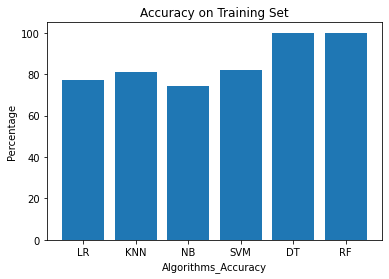

In [ ]:
from matplotlib import pyplot as plt
#logisticRegression
lr_train_acc=lr.score(X_train,y_train)*100
lr_test_acc=lr.score(X_test,y_test)*100
#kNN
knn_train_acc=knn.score(X_train,y_train)*100
knn_test_acc=knn.score(X_test,y_test)*100
#Naive-Bayes
nb_train_acc=nb.score(X_train,y_train)*100
nb_test_acc=nb.score(X_test,y_test)*100
#SupportVectorMachine
sv_train_acc=sv.score(X_train,y_train)*100
sv_test_acc=sv.score(X_test,y_test)*100
#DecisionTree
dt_train_acc=dt.score(X_train,y_train)*100
dt_test_acc=dt.score(X_test,y_test)*100
#RandomForest
rf_train_acc=rf.score(X_train,y_train)*100
rf_test_acc=rf.score(X_test,y_test)*100

y=[lr_train_acc,knn_train_acc,nb_train_acc,sv_train_acc,dt_train_acc,rf_train_acc]
x=["LR","KNN","NB","SVM","DT","RF"]
plt.xlabel("Algorithms_Accuracy")
plt.ylabel("Percentage")
plt.title("Accuracy on Training Set")
plt.bar(x,y)

<BarContainer object of 6 artists>

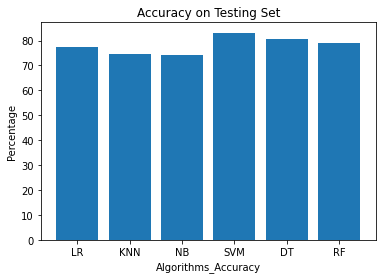

In [ ]:
y=[lr_test_acc,knn_test_acc,nb_test_acc,sv_test_acc,dt_test_acc,rf_test_acc]
x=["LR","KNN","NB","SVM","DT","RF"]
plt.xlabel("Algorithms_Accuracy")
plt.ylabel("Percentage")
plt.title("Accuracy on Testing Set")
plt.bar(x,y)